In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

np.random.seed(12345)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# ========== Data ==========

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data

,x1,x2,y
0,1.305926,1.500783,0
1,-1.717671,0.612735,1
2,-1.467331,1.843626,0
3,1.062857,-0.393577,1
4,1.378435,-0.722736,1
...,...,...,...
95,-0.710393,-0.851150,0
96,0.291995,-1.458279,0
97,-0.324825,0.045712,1
98,0.897479,-1.046809,0


In [4]:
X_train_scaled = data[["x1", "x2"]]

In [5]:
y_train = data["y"]

# ========== Model ==========

## Setting Parameter

In [6]:
clf = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation="relu",
    solver="sgd",
    alpha=0,
    batch_size=X_train_scaled.shape[0],
    learning_rate_init=1,
    max_iter=1000,
    momentum=0,
)

## Train Model

In [7]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0, batch_size=100, hidden_layer_sizes=(10, 5),
              learning_rate_init=1, max_iter=1000, momentum=0, solver='sgd')

## Loss curve

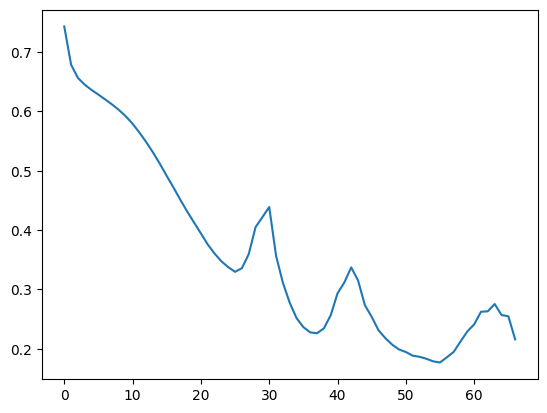

In [8]:
plt.plot(clf.loss_curve_)

## Model's Weight & Bias

In [9]:
clf.intercepts_

[array([ 3.45530833e-01,  3.18681068e-01,  1.98976778e-01, -5.31766342e-01,
         2.68458234e-01,  9.11282024e-02, -4.13547119e-04, -1.03777962e-01,
        -3.12792957e-03, -5.02267590e-01]),
 array([ 0.9286921 , -0.1697565 ,  0.21307591,  0.104865  , -0.17541018]),
 array([1.8641539])]

In [10]:
clf.coefs_

[array([[ 0.69599668, -0.9943155 , -0.34540219, -2.23707258, -0.49236328,
          0.37005259,  1.82119407, -0.09147874,  0.29894531,  0.16082498],
        [ 0.81687177,  1.04653211, -1.73500619, -0.25066436, -0.56217401,
          0.34685597, -0.0267678 ,  1.31129011,  1.29760335,  0.26486102]]),
 array([[-6.53778033e-01,  4.98656561e-01,  5.82284889e-02,
         -1.06793324e+00,  2.08574295e-01],
        [-3.06803888e-01,  8.28730402e-01, -9.64255265e-01,
          6.54436814e-01,  8.84888956e-01],
        [ 1.04961420e+00, -1.56580072e-01,  1.01164484e+00,
         -5.05448974e-01, -4.44032569e-01],
        [-1.25427895e+00, -5.23688357e-01, -4.29109119e-01,
          9.18807137e-01, -7.40549784e-01],
        [ 3.46096323e-01, -5.83825331e-01,  6.65909534e-01,
          5.32131758e-01, -1.17717085e-04],
        [-4.34481593e-01,  7.00630055e-02, -3.35981404e-01,
          1.94087551e-01,  6.50965326e-01],
        [-7.24256869e-01, -7.93600168e-01, -5.93198957e-01,
         -8.1979

# ========== Prediction ==========

In [11]:
X_test_scaled = pd.read_csv("incoming_data.csv")

In [12]:
X_test_scaled

,x1,x2
0,1,-1
1,-1,1
2,1,0
3,0,1


In [13]:
clf.predict(X_test_scaled)

array([0, 0, 1, 0], dtype=int64)

In [14]:
clf.predict_proba(X_test_scaled)

array([[7.99727009e-01, 2.00272991e-01],
       [8.69837288e-01, 1.30162712e-01],
       [1.34219615e-01, 8.65780385e-01],
       [9.99832336e-01, 1.67663810e-04]])